In [1]:
!pip install opencv-python tensorflow

In [2]:
!pip install scikit-learn opencv-python-headless tensorflow matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.5, color=True)

print("Target Names:", lfw_dataset.target_names)
print("Shape of dataset:", lfw_dataset.images.shape)

Target Names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
Shape of dataset: (1560, 62, 47, 3)


In [4]:
person1, person2 = 0, 1  # first two persons in dataset
mask = np.logical_or(lfw_dataset.target == person1, lfw_dataset.target == person2)

X = lfw_dataset.images[mask]
y = lfw_dataset.target[mask]

In [5]:
y = np.where(y == person1, 0, 1)

print("Final dataset shape:", X.shape)
print("Labels shape:", y.shape)

Final dataset shape: (313, 62, 47, 3)
Labels shape: (313,)


In [6]:
X_resized = []
for img in X:
    img_resized = cv2.resize(img, (100,100))
    X_resized.append(img_resized)
X_resized = np.array(X_resized)

In [7]:
X_resized = X_resized / 255.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resized, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
X_train = X_train.reshape(-1, 100, 100, 3)
X_test = X_test.reshape(-1, 100, 100, 3)


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32
)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 651ms/step - accuracy: 0.7479 - loss: 0.6452 - val_accuracy: 0.7619 - val_loss: 0.5562
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.7433 - loss: 0.5937 - val_accuracy: 0.7619 - val_loss: 0.5590
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.7451 - loss: 0.5787 - val_accuracy: 0.7619 - val_loss: 0.5497
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.7209 - loss: 0.5987 - val_accuracy: 0.7619 - val_loss: 0.5541
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step - accuracy: 0.7496 - loss: 0.5660 - val_accuracy: 0.7619 - val_loss: 0.5510
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step - accuracy: 0.7462 - loss: 0.5833 - val_accuracy: 0.7619 - val_loss: 0.5562
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.7581 - loss: 0.5706 - val_accuracy: 0.7619 - val_loss: 0.5503
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - accuracy: 0.7682 - loss: 0.5408 - val_accuracy: 0.7619 - val_loss:

In [12]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - accuracy: 0.7475 - loss: 0.5674
Test Accuracy: 76.19%


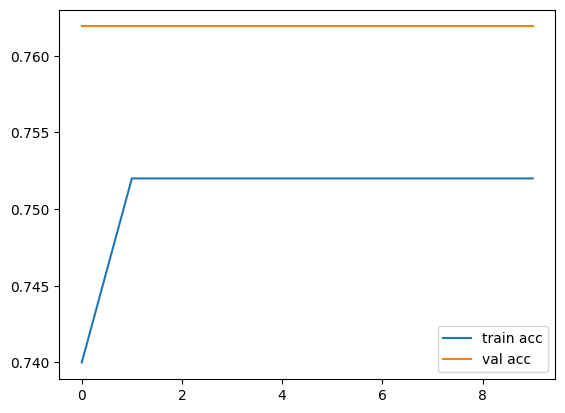

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

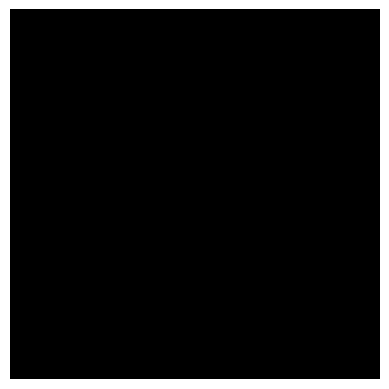

In [14]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx]
plt.imshow(sample)
plt.axis("off")
plt.show()

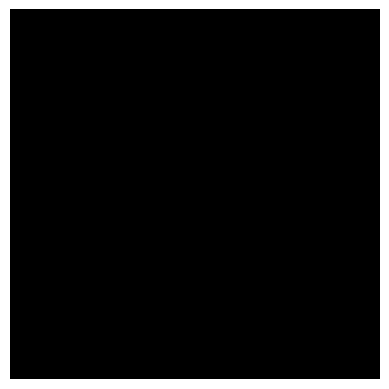

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: Person2


In [15]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx]
plt.imshow(sample)
plt.axis("off")
plt.show()

pred = model.predict(sample.reshape(1,100,100,3))
print("Predicted Class:", "Person1" if pred[0][0]<0.5 else "Person2")